In [149]:
#libraries 

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

%matplotlib inline

### Getting and Knowing your data

In [98]:
# See the first 10 entries
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [99]:
# Number of observations in the dataset

#1 
print(len(chipo))

#2
chipo.info()



4622
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [100]:
# number of columns
chipo.shape[1]

5

In [101]:
chipo.columns

Index([u'order_id', u'quantity', u'item_name', u'choice_description',
       u'item_price'],
      dtype='object')

In [102]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [103]:
#most ordered item

chipo.groupby('item_name').sum().sort_values(['quantity'], ascending = False).head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [104]:
#most ordered item in choice_description column

c = chipo.groupby('choice_description').sum()
c= c.sort_values('quantity' ,ascending = False)
c.head()

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


In [105]:
#Number of items ordered in total

chipo.quantity.sum()

4972

In [106]:
# Turn item price into float
print(chipo.item_price.dtype)

chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))

print(chipo.item_price.head())

#print(type(chipo.item_price))

object
0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64


In [107]:
#Revenue for the period in the dataset

revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [108]:
# Number of orders made in the period

chipo.order_id.value_counts().count()

1834

In [118]:
#Average Revenue amount per order

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
c = chipo.groupby(by = 'order_id').sum()
print(c.head())

c.mean()['revenue']

          quantity  item_price  revenue
order_id                               
1                4       11.56    11.56
2                2       16.98    33.96
3                2       12.67    12.67
4                2       21.00    21.00
5                2       13.70    13.70


21.394231188658654

In [122]:
#How many different items are sold

chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [123]:

chipo.item_name.value_counts().count()

50

### Filtering and Sorting 

In [131]:
# Price of each item


#delete the duplicate in item name and quantity

chipo_clean = chipo.drop_duplicates(['item_name','quantity'])

#select only the products with quantity 1

item_and_price = chipo_clean[chipo_clean.quantity == 1][['item_name','item_price']]
item_and_price.sort_values('item_price' ,ascending = False).head()


,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75


In [134]:
# sort by the name of the item 

chipo.sort_values('item_name')

,order_id,quantity,item_name,choice_description,item_price,revenue
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49,6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49,6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49


In [136]:
#quantity of the most expensive item ordered

chipo.sort_values('item_price', ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


In [141]:
#How many times were a Veggie Salad Bowl ordered

chipo[chipo.item_name == 'Veggie Salad Bowl']['quantity'].sum()

18

In [146]:
#How many times people ordered more than one Canned Soda
chipo[(chipo.item_name == 'Canned Soda') & (chipo.quantity > 1)].count()

order_id              20
quantity              20
item_name             20
choice_description    20
item_price            20
revenue               20
dtype: int64

### Visualization

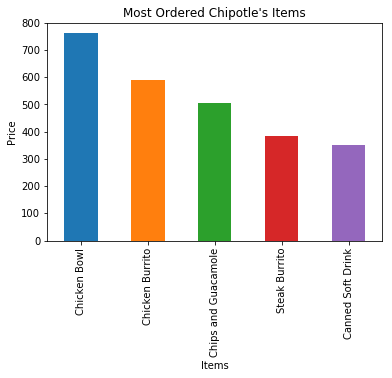

In [180]:
#Create historgram of the top 5 items bought 
df = chipo.groupby('item_name').sum().sort_values('quantity', ascending = False)
df= df.quantity.head(5)
df.plot(kind = 'bar')

#Set titles and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most Ordered Chipotle\'s Items')

plt.show()

(0, 36.7178857951459)

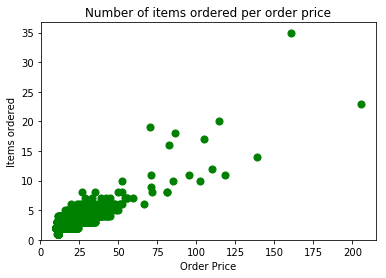

In [185]:
#Create a scatterplot with the number of items orderered per order price

orders = chipo.groupby('order_id').sum()

#orders
plt.scatter(x = orders.item_price, y=orders.quantity , s=50, c= 'green')

#labels 
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)